# Welcome lecture: "The Statistical Analysis of Time Series"

In this file, I display some examples of real and synthetic (simulated) time series. The aim of this file is to introduce you to R coding. Several tutorial sessions will give you the possibility to use R for the statistical analysis of time series data. 

R is a free software environment for statistical computing and graphics. It compiles and runs on a wide variety of UNIX platforms, Windows and MacOS. In the class *"The statistical analysis of time series"*, we are going to use R for many data analysis problems. To download the program, please choose your preferred [CRAN mirror](https://r-project.org). I also recommend the download of [RStudio](https://rstudio.com), an integrated development environment for R (and Python, see below), with a console, syntax-highlighting editor that supports direct code execution, and tools for plotting, history, debugging and workspace management. R is widely applied in the statistical analysis of dependent (time series, spatial processes, spatio-temporal random fields) and/or independent data. For this class, you are supposed to be familiar with R (you have to know how to read R code and intepret the outputs of the sofware) will have to write some codes for some tutorial sessions), but I will not ask you to code in R at the final exam.

Another software really popular in Data Science (specially for Machine Learning and neural network models for time series) is [Python](https://www.python.org). On occasions, I am planning to show some data analysis via Python, but R remains the main software for this class.


Some real data examples are available in R and/or in the book 
[*Time Series Analysis and Its Applications With R Examples*](https://springer.com/gp/book/9783319524511). Other data are available on in R. To visualize
the built in data sets use 

In [1]:
data()



You can get familiar with R playing around these datasets. See Example 1 below. 

As far as synthetics For the synthetic data, we attach the R code to reproduce the plot. See Example 2 below.

*Remark. This file is produced using [Jupyter](https://jupyter.org) for R, via the [rnotebook](www.rnotebook.io). To run it in your laptop/desktop, you do not need to install R. This is a web-based application---all that you need is a borwser like Safari or Chrome (some versions of Firefox may create issues). Project Jupyter exists to develop open-source software, open-standards, and services for interactive computing across dozens of programming languages. Enjoy!*


## Example 1 (Johnson & Johnson data, from TSA)

We shows quarterly earnings per share for the U.S. company Johnson & Johnson. There are 84 quarters (21 years) measured from the first quarter of 1960 to the last quarter of 1980.

In [2]:
data(JohnsonJohnson)

The first 8 recordes availanble in the data set looks like this:

In [3]:
nobs <- 8 # you may change nobs to preview more/less records
head(JohnsonJohnson, nobs) 

[1] 0.71 0.63 0.85 0.44 0.61 0.69 0.92 0.55

We may plot the points, one point for each year as in the following 

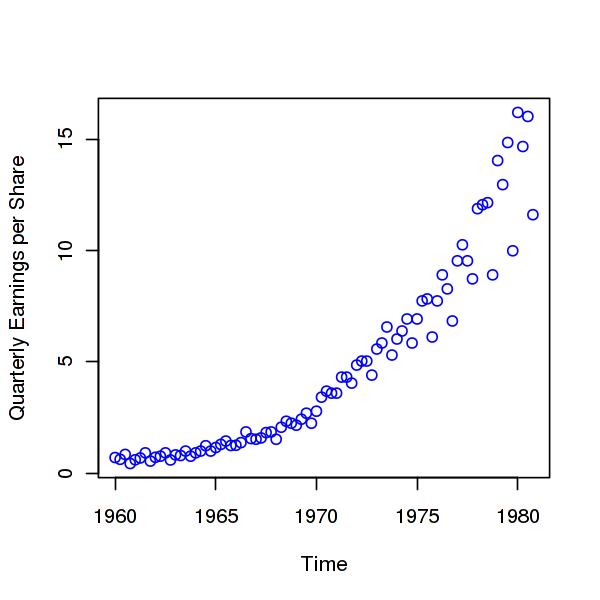

In [4]:
options(repr.plot.width=5, repr.plot.height=5)  # graphical parameter: resize the plot
plot(JohnsonJohnson, type="p", ylab="Quarterly Earnings per Share", col="blue")

or join the dots 

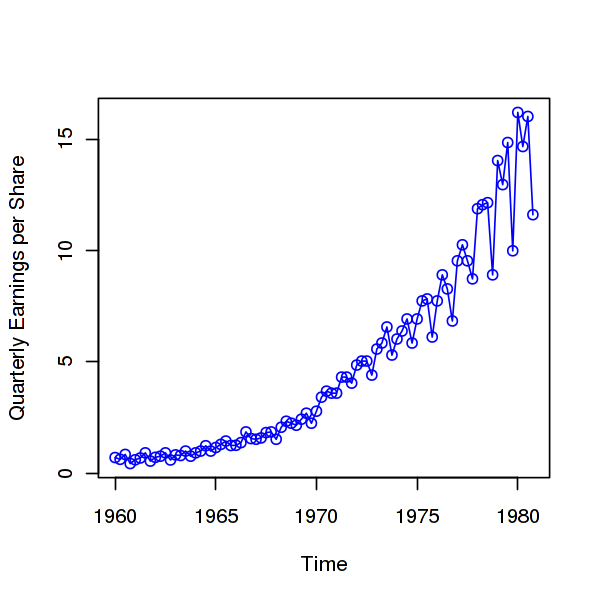

In [26]:
options(repr.plot.width=5, repr.plot.height=5)  # graphical parameter: resize the plot
plot(JohnsonJohnson, type="o", ylab="Quarterly Earnings per Share", col="blue")

Modeling such series begins by observing the primary patterns in the time history: positive trend (exponential growth) and the rather regular variation superimposed on the trend that seems to repeat over quarters (see Lecture 2).

## Example 2 (Synthetic data)

We illustrate the use of `plotly` a popular graphing library, inspired by Python. We start by simulating a * Gaussian White Noise* (see Lecture 2) trajectory, containing 1000 observations. To make the simulation realistic, we use as time index the calendar time: we simulate strarting from today and proceeding backward. Let's try it!

In [ ]:
library(plotly)                  # load the library for Python style plots

today <- Sys.Date()
nsize <- 1000                    # you may change the sample size and play with the series
tm <- seq(0, nsize, by = 10) 
x <- today - tm
set.seed(123)                    # uncomment this line to freeze the seed and obtain always the same trajectory
y <- rnorm(length(x))            # this generate random drawings from a standard normal

fig <- plot_ly(x = ~x, y = ~2*y, # I use "times 2" to rescale the y series to have larger variability
               mode = 'lines',
               type="scatter",
               text = paste(tm, "days from today"))

fig

For some versions of Firefox, the library plotly may not work on web-based applications. If this is the case for your browser, you may not be able to see the output of the previous code. To see the simulated trajectory, please resort on standard plot function and run

In [ ]:
today <- Sys.Date()
nsize <- 1000                    # you may change the sample size and play with the series
tm <- seq(0, nsize, by = 10) 
x <- today - tm
set.seed(123)                    # uncomment this line to freeze the seed and obtain always the same trajectory
y <- rnorm(length(x))     

options(repr.plot.width=5, repr.plot.height=5)  # graphical parameter: resize the plot
plot(x,y,type="l", lty=1,lwd=1, xlab="Date", 
     ylab="Y time series",
     col="grey10",
     main="Simulated Gaussian White Noise")     # visualize the Gaussian White Noise
abline(h=0,col="black",lty=2)                   # add horizontal line at zero

We can compute some informative statistics (more to come in the course), like e.g. the autocorrelation function, which provides us with info about the

$$\rho_Y(h):=\text{corr}(Y_{t},Y_{t-h}),$$ 

and we use $h\geq 0$---see Lecture 2 for the mathematical detail. Just to give you an intuition on this function, the autocorrelation function (ACF) represents a first/natural measure to consider if we want to investigate the presence of **linear** dependence over time in a time series. 

The R code to estimate ACF using the simulated trajectory of the simulated White Noise and setting h in the interval [0,15] is

In [ ]:
options(repr.plot.width=5, repr.plot.height=5)  # graphical parameter: resize the plot
acf(y, lag=15, main="White Noise estimated ACF")

In the above plot, on the x-axis we have the lag (we label it $h$), while on the y-axis we read the value of the corresponding estimated ACF. The picture illustrates that there is no significant (serial) autocorrelation at any lag (but lag equal to zero, which represents the process variance). Indeed, no black vertical line is outside the blue dotted horizontal lines (which are confidence intervals for the ACF estimates at each lag). For detail about the `acf` routine, you may enquire directly R help using the command

In [8]:
help(acf)

As in the setting of independent and identically distributed random variables, we may be interested at glancing some distributional aspects (like e.g. the min, max, median...) of the considered time series. To get this piece of info, we use the command `summary` as follows

In [11]:
summary(y)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.62900 -0.76920 -0.08660  0.07476  0.92310  2.89800 

We may also want to visualize the histrogram of the simulated time series. Toward this end run the following command

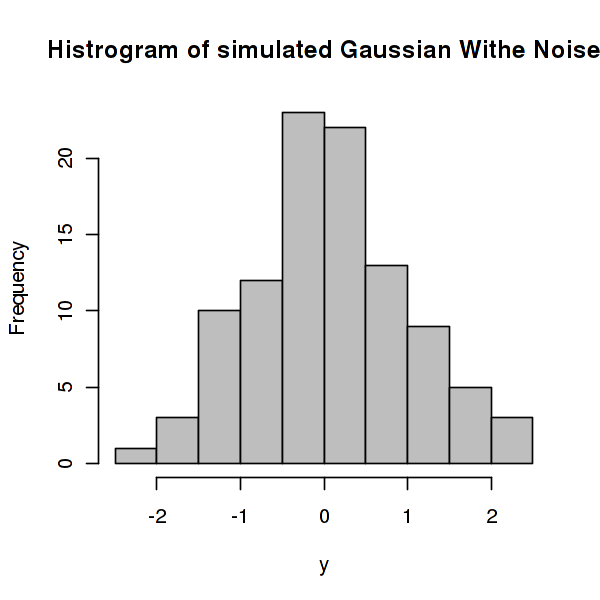

In [13]:
options(repr.plot.width=5, repr.plot.height=5)  # graphical parameter: resize the plot
hist(y, col="gray", main="Histrogram of simulated Gaussian Withe Noise")

We can also estimate (nonparametrically) the density of the simulated time series. To this end run the code 

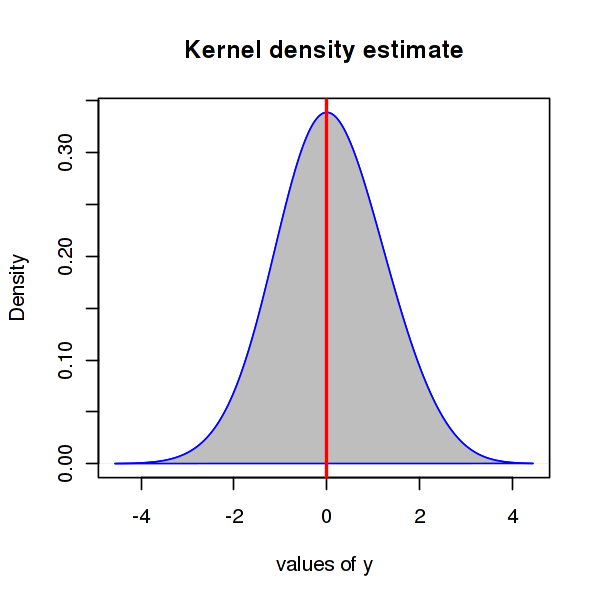

In [12]:
# Kernel Density Plot
d <- density(y, bw=0.75)                                        # returns the density data 
options(repr.plot.width=5, repr.plot.height=5)                  # graphical parameter: resize the plot
plot(d, main="Kernel density estimate", 
     col="blue", xlab="values of y")                            # plots the results
polygon(d, col="grey", border="blue")                           # fill in the curve
abline(v=0, col="red", lwd=2)                                   # highlight the median/mean

The plot illustrate the Gaussian behaviour of the simulated time seris, whose density is centered at zero. 

# Bivariate time series

Sometimes we need to analyse more then one time series, simulataneously. This is the goal of multivariate time series analysis. I briefly present an example: we will work on this topic in the last part of the course.


## Example 3 (GDP in UK, Canada and USA)
Consider the quarterly growth rates, in percentages, of real gross domestic product (GDP) of United Kingdom, Canada, and  United States from the second quarter  of 1980 to the second quarter of 2011 (n = 125 obs per time series). 
The data were seasonally adjusted and downloaded from the database of Federal Reserve Bank 
at St. Louis. The GDP were in millions of local currency. We display the curves in the next plot.

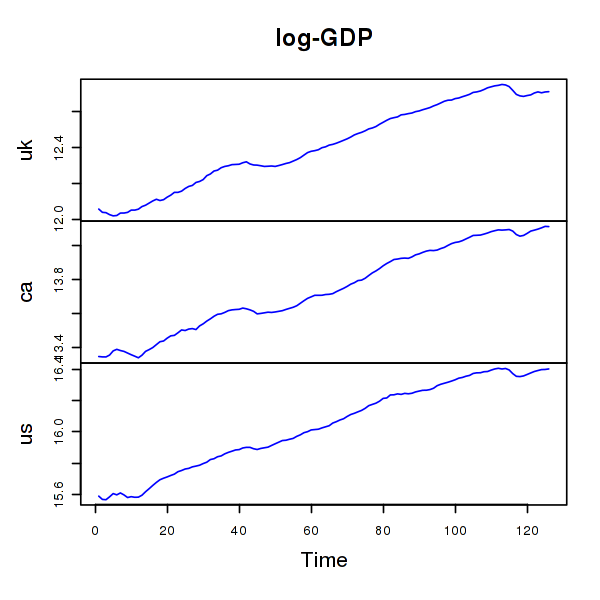

In [18]:
library(MTS)
data("mts-examples",package="MTS")
gdp <- log(qgdp[,3:5])                         # take the log of the data
options(repr.plot.width=5, repr.plot.height=5) # graphical parameter: resize the plot
plot.ts(gdp,lwd=1, main="log-GDP",col="blue")  # plot the time series

The series show a clear trend in time. As it is customary in macroeconomic analysis, we differentiate the three time series: this yields the growth rate of the GDP in each country. We plot the resulting time series: 

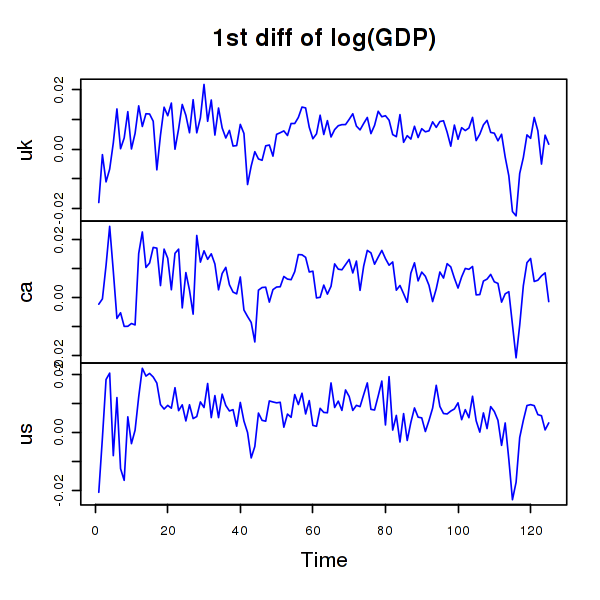

In [16]:
zt <- diffM(gdp)                                      # compute 1st difference GDP(t) - GDP(t-1) for each country
options(repr.plot.width=5, repr.plot.height=5)        # graphical parameter: resize the plot
plot.ts(zt,lwd=1, col=4, main="1st diff of log(GDP)")  # plot the resulting curves

We may now look at the degree of linear dependence between contemporanous GDP growth rates, using a scatter plot as obtained by the command `pairs`

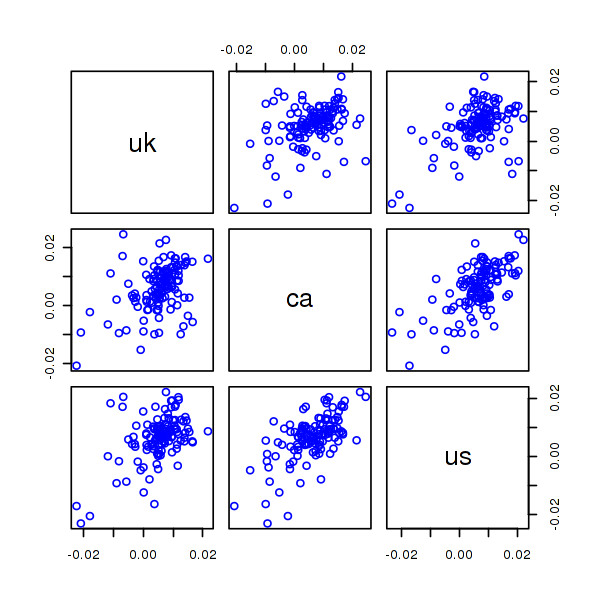

In [4]:
options(repr.plot.width=5, repr.plot.height=5)                  # graphical parameter: resize the plot
pairs(zt, col=4)

The plots suggest there is a linear relation between the GDP growth at time $t$ over the different countries.

We may also think of a linear relation between the growth rates in one country at time $t$ and the growth rate of another country at a lagged time (e.g., $t-1$). To this end we can compute the cross-correlation (`ccf`) between the two series; see Lecture 1. Here  we consider the case of UK and CA and UK and USA.

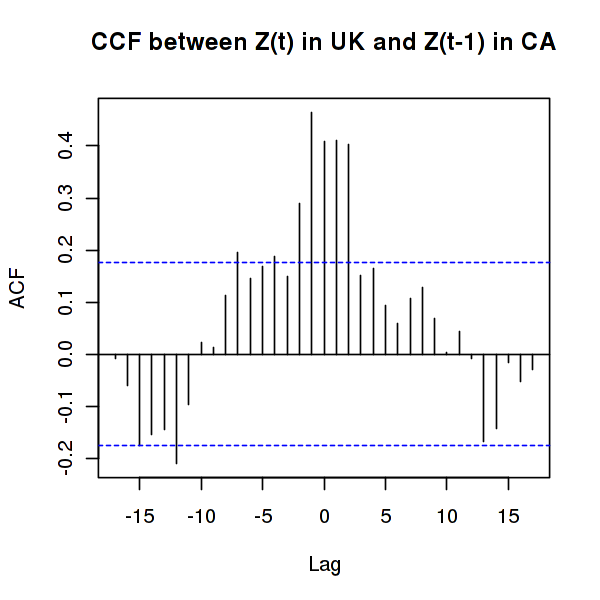

In [17]:
lagged_zt <- lag(zt, 1)
options(repr.plot.width=5, repr.plot.height=5)                            # graphical parameter: resize the plot
ccf(zt[,1],lagged_zt[,2], main="CCF between Z(t) in UK and Z(t-1) in CA")                
# help(ccf) for info about the ccf routine in R

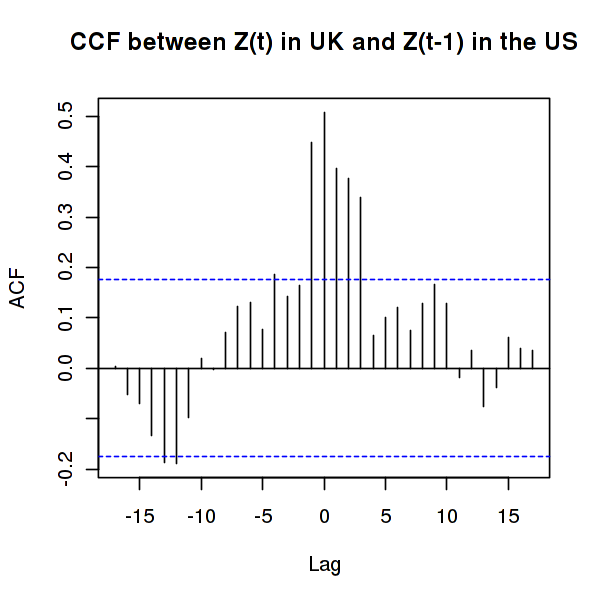

In [14]:
options(repr.plot.width=5, repr.plot.height=5)                            # graphical parameter: resize the plot
ccf(zt[,1],lagged_zt[,3], main="CCF between Z(t) in UK and Z(t-1) in the US")                 

The two pictures illustrate that the past growth rate in Canada and in the US have an impact on the UK growth rate.

# A word of caution: standard iid statistical tools may not work for time series analysis 

Due to the time dependence among consecutive observations, the standard inferential tools widely-applied in the analysis of i.i.d. data may not work in the statistical analysis of time series data. Here we consider an example which illustrates a pitfall for the use of the bootstrap. 

The *bootstrap* is a widely applicable and powerful statistical tool that can be used to quantify the uncertainty associated with a given estimator or statistical learning method. As a simple example, in the i.i.d. setting, the bootstrap can be used to estimate the distribution of a coefficient in a linear regression fit. In the specific case of linear regression, standard statistical software such as R outputs an information on the estimate's distribution automatically, but often the computation is based on the asymptotic theory (very large sample size). The bootstrap is able to give information on the estimate's distribution, which is accurate  even for small to moderate sample sizes.
Moreover, the boostrap can be easily applied to a wide range of statistical learning methods, including some for which a measure of variability is otherwise difficult to obtain and is not automatically output by statistical software (e.g, becuase the derivation of the asymptotic theory is very complicated). We refer to [*An Introduction to Statistical Learning*](http://faculty.marshall.usc.edu/gareth-james/ISL/) for a book-length discussion.




## EXAMPLE (Caveat)##

### IID setting###

Suppose that we wish to invest a fixed sum of money in two financial assets that yield returns of $X$ and $Y$, respectively, where $X$ and $Y$ are Gaussian random quantities. We will invest a fraction $\alpha$ of our money in $X$, whilst we will invest $1- \alpha$ in the asset $Y$. Clearly, there is variability associated with the returns on these two assets. Therefore, we select $\alpha$ to minimize the total risk, or variance, of our investment. Namely, we minimize $\text{V}(\alpha X + (1 -\alpha)Y)$. One can show that the optimal weight is the value that minimizes the risk is given by $$\alpha = \frac{V(Y)-\text{Cov}(X,Y)}{V(X)+V(Y)-2\text{Cov}(X,Y)}$$

Clearly, the variance of X, Y and their covariance are unknown. Thus, we
estimates for these quantities using a data set that
contains past measurements for X and Y. Then, we plug-in the estimates in the expression of optimal weight and we obtain an estimate $\hat\alpha$ as

$$
\hat\alpha = \frac{\hat{V(Y)}-\hat{\text{Cov}(X,Y)}}{\hat{V(X)}+\hat{V(Y)}-2\hat{\text{Cov}(X,Y)}}
.$$

Specifically, suppose we have two samples for X and Y, each containing n=50 observations. We estimate the variances and covariance via sample sums and we get the estimate of the optimal weigth. This yields a point estimate. It is natural to wish to quantify the accuracy of our estimate. To this end we obtain a distribution of the estimator by repeateding the process of simulating 1000 paired observations of X and Y, and estimating $\alpha$ for each of them. 

The code to perform this analysis is:

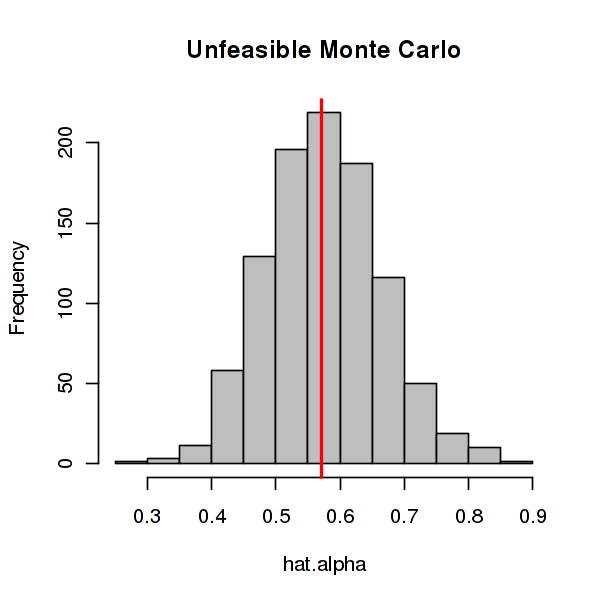

In [27]:
set.seed(1235)
nsize <- 50
s11 <- 1
s12 <- s21 <-0.25   # this controls the correlation betwenn X and Y
s22 <- 1.25 
Sigma <- matrix(c(s11,s12,s12,s22),2,2)

hat.alpha<-NULL
for (i in 1:1000) {
  normal.vector<-MASS::mvrnorm(n=nsize, mu=c(0, 0), Sigma)
  x<-normal.vector[,1]
  y<-normal.vector[,2]
  hat.alpha[i] <- (var(y)-cov(x,y))/(var(x)+var(y)-2*cov(x,y))
   }

options(repr.plot.width=5, repr.plot.height=5)                            # graphical parameter: resize the plot
hist(hat.alpha, col="grey", main="Unfeasible Monte Carlo")                                               # histogram of the estimated alpha
true.aplha <- (s22-s12)/(s11+s22-2*s12)
abline(v=true.aplha,lwd=2,col=2)  # red vertical line represents the true alpha, as obtained using the true var and cov


This procedure is artificial since we pretend to have multiple realizations (1000 in our simulation) of the pair X an Y. In practice, however, the procedure outlined above cannot be applied, because for real data we cannot generate new samples from the original population. However, the *bootstrap* approach allows us to use a computer to emulate the process of obtaining new sample sets, so that we can estimate the distribution of $\hat\alpha$, without generating additional samples. *Rather than repeatedly obtaining independent data sets from the population, we instead obtain distinct data sets by repeatedly sampling observations from the original data set.*

In [28]:
set.seed(1235)
normal.vector<- MASS::mvrnorm(n=nsize, mu=c(0, 0), Sigma)
x<- normal.vector[,1]  # unique sample for X
y<- normal.vector[,2]  # unique sample for Y
B<- 500                # number of Bootstrap sample
hat.alpha_ast<- NULL

for (l in 1:B){    # Bootstrap loop
  x_ast<-sample(x,length(x),replace = T)
  y_ast<-sample(y,length(x),replace = T)
  hat.alpha_ast[l] <- (var(y_ast)-cov(x_ast,y_ast))/(var(x_ast)+var(y_ast)-2*cov(x_ast,y_ast))
}

Then, we may check the ability of the bootstrap to capture the distribution of $\hat{\alpha}$, comparing it to the  unfeasible Monte Carlo described above. Specifically, we copare the boxplot obtained by the unfeasible Monte Carlo simulation with the boxplot obtained using the bootstrap. The code below performs this comparison:

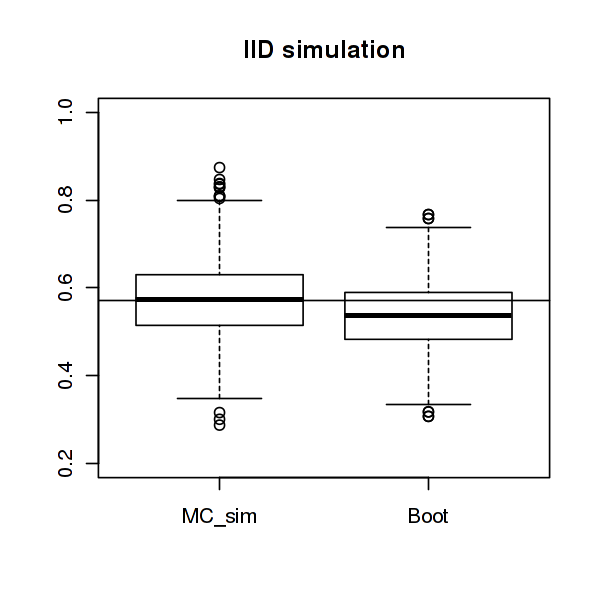

In [29]:
MC_sim <- hat.alpha 
Boot<- hat.alpha_ast 
hats<-cbind(MC_sim,Boot)
options(repr.plot.width=5, repr.plot.height=5)                            # graphical parameter: resize the plot
boxplot(hats, ylim=c(0.2,1), main="IID simulation")
abline(h=true.aplha)

We note that the boxplots look similar: the left-hand boxplot (which displays the idealized distribution of the estimates of $\alpha$ obtained by generating 1000 simulated data sets from the true population) is rather similar to the one one the rigth, related to the use bootstrap.

### Time series data ###

Let's re-do the same exercise as in the previous subsection, but now we have that the entries of X and Y are not IID, rather they follow an autoregressive process of order one---roughly speaking there is a strong covariance between the contemporaneous and the lagged values of X and of Y. 

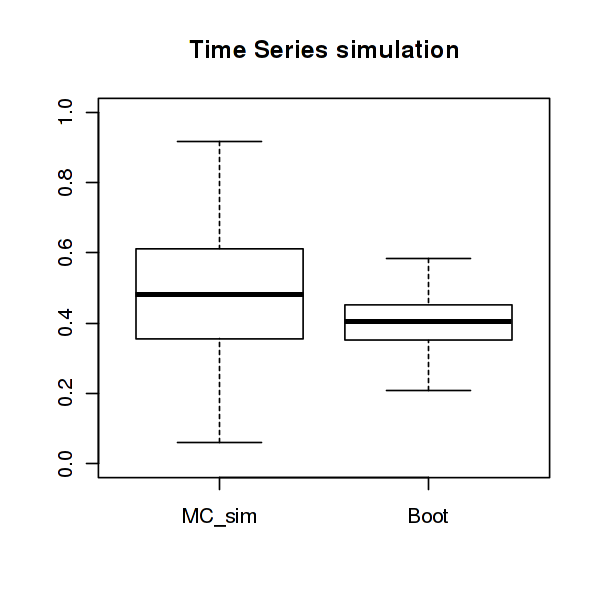

In [26]:
set.seed(1235)
rho1<- -0.9   # AR1 coeff for X
rho2<- 0.9    # AR1 coeff for Y


## Unfeasible Monte Carlo

hat.alpha<-NULL
for (i in 1:1000) {
  normal.vector<-MASS::mvrnorm(n=nsize, mu=c(0, 0), Sigma)
  err1<-normal.vector[,1]
  err2<-normal.vector[,2]
  x1<-y1<-NULL
  x1[1]<-y1[1]<-0
  for (j in 2:nsize){
    x1[j] <- rho1*x1[j-1]+ err1[j]
    y1[j] <- rho2*y1[j-1]+ err2[j]
  }
  hat.alpha[i] <- (var(y1)-cov(x1,y1))/(var(x1)+var(y1)-2*cov(x1,y1))
}


## Bootstrap

set.seed(1235)
normal.vector<-MASS::mvrnorm(n=nsize, mu=c(0, 0), Sigma)
err1<-normal.vector[,1]
err2<-normal.vector[,2]
x1<-y1<-NULL
x1[1]<- y1[1] <-0
for (j in 2:nsize){
  x1[j] <- rho1*x1[j-1]+ err1[j]
  y1[j] <- rho2*y1[j-1]+ err2[j]
}

B<- 500
hat.alpha_ast<- NULL

for (l in 1:B){  # Bootstrap loop
  x_ast<-sample(x1,length(x1),replace = T)  # iid boostrapping (DANGER!!!!)
  y_ast<-sample(y1,length(y1),replace = T)  # iid boostrapping (DANGER!!!!)
  hat.alpha_ast[l] <- (var(y_ast)-cov(x_ast,y_ast))/(var(x_ast)+var(y_ast)-2*cov(x_ast,y_ast))
}

MC_sim <- hat.alpha 
Boot<- hat.alpha_ast 
hats<-cbind(MC_sim,Boot)
options(repr.plot.width=5, repr.plot.height=5)                            # graphical parameter: resize the plot
boxplot(hats, ylim=c(0,1), main="Time Series simulation")

We note that the **boxplots look different**. The left-hand boxplot (which displays the idealized distribution of the estimates of $\alpha$ obtained by generating 1000 simulated data sets from the true population) is rather **different** from the one one the rigth, related to the use bootstrap. 

There are several reasons for this difference. One of them is related to the way in which we generate the bootstrap samples. **If we resample with replacement from the entries of X and of Y, we ignore the time series dependence which characterizes the random quantities we are working on.** Thus, we conclude that time dependence matters!!!